# BRAZILIAN DATASET

WRAGRLING DATA

### IMPORT LIBRARY

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)

### GATHERING DATA

In [3]:
cust = pd.read_csv('olist_customers_dataset.csv')
geo = pd.read_csv('olist_geolocation_dataset.csv')
item = pd.read_csv('olist_order_items_dataset.csv')
payment = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
order = pd.read_csv('olist_orders_dataset.csv')
product = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
productCategory = pd.read_csv('olist_product_category_name_translation.csv')

In [4]:
print('cust :', cust.shape, cust.columns)
print('geo:', geo.shape, geo.columns)
print('item:',item.shape, item.columns)
print('payment:',payment.shape, payment.columns)
print('reviews:',reviews.shape, reviews.columns)
print('order:',order.shape, order.columns)
print('product:',product.shape, product.columns)
print('sellers:',sellers.shape, sellers.columns)
print('productCategory:',productCategory.shape, productCategory.columns)


cust : (99441, 5) Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
geo: (1000163, 5) Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
item: (112650, 7) Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
payment: (103886, 5) Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
reviews: (99224, 7) Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
order: (99441, 8) Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'o

### ASSESSING DATA

#### DATA TYPE

In [6]:
print (f'\n cust:{cust.info()}\n' ),
print (f'\n geo:{geo.info()}\n' ),
print (f'\n item:{item.info()}\n' ),
print (f'\n payment:{payment.info()}\n' ),
print (f'\n order:{order.info()}\n' ),
print (f'\n product:{product.info()}\n' ),
print (f'\n sellers:{sellers.info()}\n' ),
print (f'\n productCategory:{productCategory.info()}\n' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 cust:None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             10001

Changing the data type to datetime:
shipping_limit_date , order_purchase_timestamp,
order_approved_at ,
order_delivered_carrier_date ,
order_delivered_customer_date   ,
order_estimated_delivery_date

In [9]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
order[date_columns] = order[date_columns].apply(pd.to_datetime)

In [10]:
item['shipping_limit_date'] = pd.to_datetime(item['shipping_limit_date'])

in this step i'll converts the date fields in the 'order' and 'item' dataframes into a processable format, allowing for more efficient time analysis

#### MISSING VALUES

In [7]:
print (f'\n cust:{cust.isna().sum()}\n' ),
print (f'\n geo:{geo.isna().sum()}\n' ),
print (f'\n item:{item.isna().sum()}\n' ),
print (f'\n payment:{payment.isna().sum()}\n' ),
print (f'\n order:{order.isna().sum()}\n' ),
print (f'\n product:{product.isna().sum()}\n' ),
print (f'\n sellers:{sellers.isna().sum()}\n' ),
print (f'\n productCategory:{productCategory.isna().sum()}\n' )


 cust:customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


 geo:geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


 item:order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


 payment:order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


 order:order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_deli

In [ ]:
# Interpolation for the columns order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date.
order[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']] = order[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].interpolate(method='pad', axis=0)

in this step I use the 'pad' interpolation method to fill in the missing values ​​in a specific date column in the 'order' dataframe with the last known values. This is done to ensure that missing date data is filled in with previous values ​​in a reasonable time sequence.

In [12]:
# Find the median for each column that has missing values
median_values = product[['product_name_lenght', 'product_description_lenght',
                    'product_photos_qty', 'product_weight_g', 'product_length_cm',
                    'product_height_cm', 'product_width_cm']].median()

# Filling missing values with the median.
product[[ 'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g', 'product_length_cm',
    'product_height_cm', 'product_width_cm']] = product[['product_name_lenght',
                                                     'product_description_lenght', 'product_photos_qty',
                                                     'product_weight_g', 'product_length_cm',
                                                     'product_height_cm', 'product_width_cm']].fillna(median_values)

In this step, I calculate the median for each column that has missing values, such as the length and width of the product. The median is chosen because it is more resistant to outliers compared to the mean. The next step is to fill in the missing values in each column with the corresponding median value to ensure a stable representation of each column.

In [13]:
product = product.merge(productCategory, how='inner', on = 'product_category_name')

In this stage, we are merging the 'product' dataframe with the 'productCategory' dataframe based on the 'product_category_name' column using the inner join method. The purpose is to delve deeper into insights of the products by enriching product information with the related category.

In [14]:
print(product.shape)
product.head()

(32328, 10)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [15]:
#checking kategory yang tidak ada
diffCat = product.query("product_category_name.notnull() and product_category_name_english.isnull()")
categories = set(diffCat["product_category_name"])
print(categories)
#mengganti kategori yang tidak ada dalam english dengan translasi dari bahasa asli
product["product_category_name_english"] = np.where(product["product_category_name"]
                                                    == 'pc_gamer', 'PC Gaming', product
                                                    ["product_category_name_english"])


product["product_category_name_english"] = np.where(product["product_category_name"]
                                                            =='portateis_cozinha_e_preparadores_de_alimentos', 'tool for kitchen',
                                                            product["product_category_name_english"])


set()


In this step, I am checking categories that do not have values in the 'product_category_name_english' column but have values in the 'product_category_name' column. Once categories without translations into English are found, the code replaces their values with pre-determined translations. This helps in consistency and ensures that each category has an appropriate translation for easier and consistent analysis.

In [16]:
product['product_category_name'].fillna('undefined', inplace= True)
product['product_category_name_english'].fillna('undefined', inplace= True)

product.isna().sum()


product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In this step, I am filling the missing values in the 'product_category_name' and 'product_category_name_english' columns with the string 'undefined'. This is done to mark categories that were not previously defined or do not have translations in English.

In [17]:
print (f'\n cust:{cust.shape}\n' ),
print (f'\n cust:{cust.columns}\n' ),
print (f'\n geo:{geo.shape}\n' ),
print (f'\n geo:{geo.columns}\n' ),
print (f'\n item:{item.shape}\n' ),
print (f'\n item:{item.columns}\n' ),
print (f'\n payment:{payment.shape}\n' ),
print (f'\n payment:{payment.columns}\n' ),
print (f'\n order:{order.shape}\n' ),
print (f'\n order:{order.columns}\n' ),
print (f'\n product:{product.shape}\n' ),
print (f'\n product:{product.columns}\n' ),
print (f'\n sellers:{sellers.shape}\n' ),
print (f'\n sellers:{sellers.columns}\n' ),
print (f'\n productCategory:{productCategory.shape}\n' )
print (f'\n productCategory:{productCategory.columns}\n' )


 cust:(99441, 5)


 cust:Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


 geo:(1000163, 5)


 geo:Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


 item:(112650, 7)


 item:Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


 payment:(103886, 5)


 payment:Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


 order:(99441, 8)


 order:Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


 product:(32328, 10)


 product:Index(['product_id', 'product_cate

#### CHEKING MISSING VALUES

In [18]:
print (f'cust:{cust.isna().sum()}\n' ),
print (f'geo:{geo.isna().sum()}\n' ),
print (f'item:{item.isna().sum()}\n' ),
print (f'payment:{payment.isna().sum()}\n' ),
print (f'order:{order.isna().sum()}\n' ),
print (f'product:{product.isna().sum()}\n' ),
print (f'sellers:{sellers.isna().sum()}\n' ),
print (f'productCategory:{productCategory.isna().sum()}\n' )

cust:customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

geo:geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

item:order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

payment:order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

order:order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

pr

#### DUPLICATED

In [19]:
print (f'geo:{geo.duplicated().sum()}\n' ),
print (f'cust:{cust.duplicated().sum()}\n' ),
print (f'item:{item.duplicated().sum()}\n' ),
print (f'payment:{payment.duplicated().sum()}\n' ),
print (f'order:{order.duplicated().sum()}\n' ),
print (f'product:{product.duplicated().sum()}\n' ),
print (f'sellers:{sellers.duplicated().sum()}\n' ),
print (f'productCategory:{productCategory.duplicated().sum()}\n' )

geo:261831

cust:0

item:0

payment:0

order:0

product:0

sellers:0

productCategory:0



'geo' has 261,831 duplicated rows.

In [21]:
geo.drop_duplicates(inplace=True)

#### CHECKING DUPLICATED


In [22]:
print (f'geo:{geo.duplicated().sum()}\n' ),
print (f'cust:{cust.duplicated().sum()}\n' ),
print (f'item:{item.duplicated().sum()}\n' ),
print (f'payment:{payment.duplicated().sum()}\n' ),
print (f'order:{order.duplicated().sum()}\n' ),
print (f'product:{product.duplicated().sum()}\n' ),
print (f'sellers:{sellers.duplicated().sum()}\n' ),
print (f'productCategory:{productCategory.duplicated().sum()}\n' )

geo:0

cust:0

item:0

payment:0

order:0

product:0

sellers:0

productCategory:0



### EDA

#### Customer Distribution

In [ ]:
custgeo = cust.merge(geo, how='left', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
print(custgeo.shape)
custgeo.head()


In [ ]:
nsample = 99441
resultSample = custgeo.sample(n=nsample)
custgeo = resultSample
print(custgeo.shape)
custgeo.head()

In this step, I am merging customer data with geolocation data based on postal codes, aiming to observe the geographic distribution of customers. Then, I am taking a random sample of 99,441 rows to suit the needs of creating a dashboard displaying customer locations based on latitude and longitude. This allows for a representative visualization of the geographic distribution of customers on the dashboard.

In [ ]:
sellergeo = sellers.merge(geo, how='left', left_on = 'seller_zip_code_prefix', right_on = 'geolocation_zip_code_prefix')
print(sellergeo.shape)
sellergeo.head()
nsellersample = 3095
sellerGeoDataset = sellergeo.sample(n=nsellersample)
print(sellerGeoDataset.shape)

print(sellerGeoDataset.info())


In this step, we merge seller data with geolocation data based on postal codes, similar to the previous process for customer data. The objective is to observe the geographic distribution of sellers. Then, we take a random sample of 3,095 rows to fit the requirements for creating a dashboard displaying seller locations based on latitude and longitude. This allows for a representative visualization of the geographic distribution of sellers on the dashboard.

##### City and State

In [20]:
custCity = cust['customer_city'].value_counts(ascending=False).head(10)
custState = cust['customer_state'].value_counts(ascending=False).head(10)
custCity,custState

(customer_city
 sao paulo                15540
 rio de janeiro            6882
 belo horizonte            2773
 brasilia                  2131
 curitiba                  1521
 campinas                  1444
 porto alegre              1379
 salvador                  1245
 guarulhos                 1189
 sao bernardo do campo      938
 Name: count, dtype: int64,
 customer_state
 SP    41746
 RJ    12852
 MG    11635
 RS     5466
 PR     5045
 SC     3637
 BA     3380
 DF     2140
 ES     2033
 GO     2020
 Name: count, dtype: int64)

In this step, I want to analyze customer data based on city and state to identify the top 10 cities and top 10 states with the highest number of customers.

Insight: São Paulo emerges as the city and state with the highest number of customers.

In [27]:
def barChart(data, x=None, y=None, ylabel=None, xlabel=None, title=None, hue=None):
    plt.figure(figsize=(10,5))
    sns.barplot(data=data, x=x, y=y, hue=hue)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(rotation=45)
    plt.legend([], frameon=False) 
    plt.show()


def barChartSubplot(data1, data2, x1=None, y1=None, x2=None, y2=None, title1=None, title2=None, palette1='viridis', palette2='bright', figsize=(15,5)):

    #subplot1
    plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    sns.barplot(data = data1, x=x1, y=y1, palette=palette1)
    plt.title(title1)
    plt.xticks(rotation=45)


    #subplot2
    plt.subplot(1,2,2)
    sns.barplot(data = data2, x=x2, y=y2, palette=palette2)
    plt.title(title2)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


def histChart (data, x=None, y=None, title=None, palette = 'viridis'):
    plt.figure(figsize=(10,5))
    sns.histplot(data=data, x=x, y=y, palette=palette)
    plt.title(title)
    plt.xticks(rotation = 45)
    plt.show()


def histChartSubplot(data1, data2, x1=None, y1=None, x2=None, y2=None, xlabel1=None, ylabel1 = None, xlabel2=None, ylabel2=None, title1=None, title2=None, palette1='bright', palette2='colorblind'):

    #subplot1
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(data = data1, x=x1, y=y1, palette=palette1)
    plt.xlabel(xlabel1)
    plt.ylabel(ylabel1)
    plt.title(title1)
    plt.xticks(rotation=45)


    #subplot2
    ax2 = plt.subplot(1,2,2)
    sns.barplot(data = data2, x=x2, y=y2, palette=palette2)
    plt.xlabel(xlabel2)
    plt.ylabel(ylabel2)
    plt.title(title2)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

def pieChart(data, explode=None, title=None):
    plt.figure(figsize=(15, 5))
    plt.pie(data, autopct='%1.1f%%', explode=explode, startangle=140)
    plt.title(title)
    plt.legend(data.index)
    plt.show()

These functions are intended to facilitate data visualization later on, including bar charts, histograms, and pie charts. These functions allow users to specify titles, axis labels, and customizable color palettes to suit their needs.

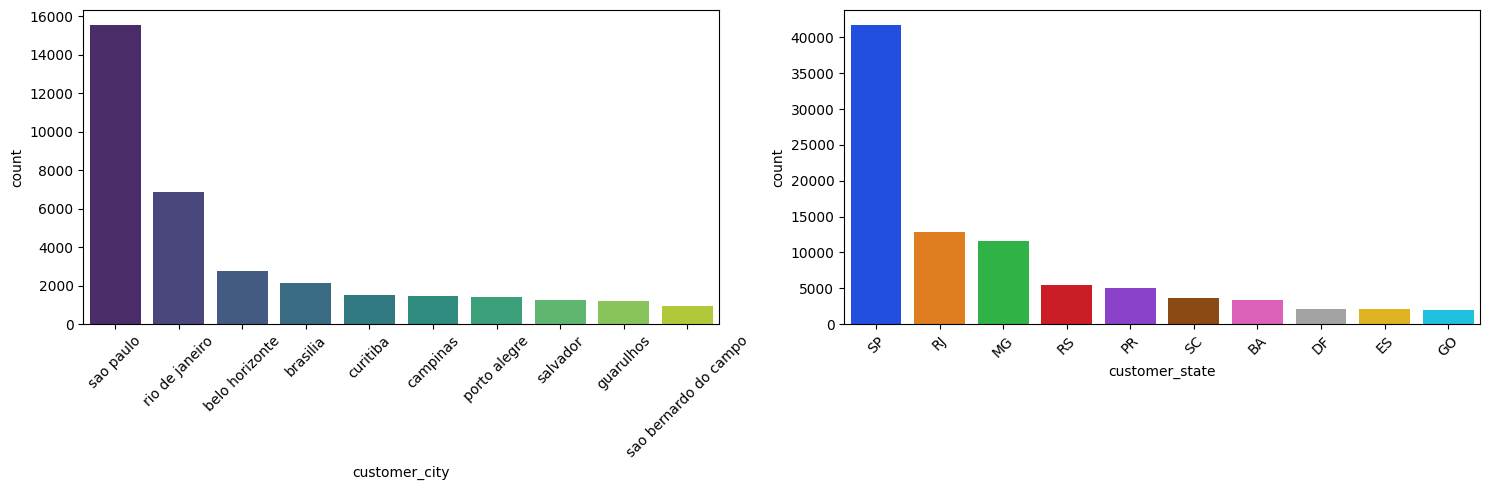

In [30]:
barChartSubplot(custCity, custState)

In [29]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### ITEM, ORDER, PRODUCT, & PAYMENT

In [30]:
print('order:',order.shape)
print('order:',order.columns)
print('item:',item.shape)
print('item:',item.columns)
print('product:', product.shape)
print('product:', product.columns)

order: (99441, 8)
order: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
item: (112650, 7)
item: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
product: (32328, 10)
product: Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')


##### Merging and Creating new Columns


This stage is the stage where several datasets are combined to dig deeper insights


##### Time Order


In [32]:

orderItem = order.merge(item, how='inner', on ='order_id')
print(orderItem.shape)
orderItem.head()

(112650, 14)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [33]:
orderItem['Order in Procces in day'] = orderItem['order_delivered_carrier_date'].dt.day - orderItem['order_approved_at'].dt.day 

print(orderItem.shape)
orderItem.head()

(112650, 15)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Order in Procces in day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,4
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,1


To see how long an order takes to process from the start after ordering, we create a new column to see this more clearly in the Order in Process in day column.

In [34]:
orderItem['Day Delivered Customer'] = orderItem['order_delivered_customer_date'].dt.day - orderItem['order_purchase_timestamp'].dt.day

Create a new column to see how long it takes for orders to reach customers with the name Day Delivered Customer

In [35]:
orderItem['Variance Time'] = orderItem['order_delivered_customer_date'].dt.day - orderItem['order_estimated_delivery_date'].dt.day

Create a new column to see the difference in days between the order received by the customer and the estimate scheduled by the seller with column Variance Time


In [36]:
orderItem['Delivery Status'] = ''

for i, r in orderItem.iterrows():
  if r['order_delivered_customer_date']< r['order_estimated_delivery_date']:
    orderItem.at[i,'Delivery Status']='Earlier'
  elif r['order_delivered_customer_date'] == r['order_estimated_delivery_date']:
    orderItem.at[i,'Delivery Status'] ='Ontime'
  else:
    orderItem.at[i,'Delivery Status']='Delay'

Create a new column to identify whether the order arrived on time, or early, or late to the customer

In [37]:
print(orderItem.shape)
orderItem.head()

(112650, 18)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Order in Procces in day,Day Delivered Customer,Variance Time,Delivery Status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,8,-8,Earlier
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,0,-17,-6,Earlier
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,0,9,13,Earlier
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,4,-16,-13,Earlier
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,1,3,-10,Earlier


In [39]:
countStatus = orderItem['Delivery Status'].value_counts(ascending=False)
countStatus

Delivery Status
Earlier    102626
Delay       10024
Name: count, dtype: int64

Chart Status

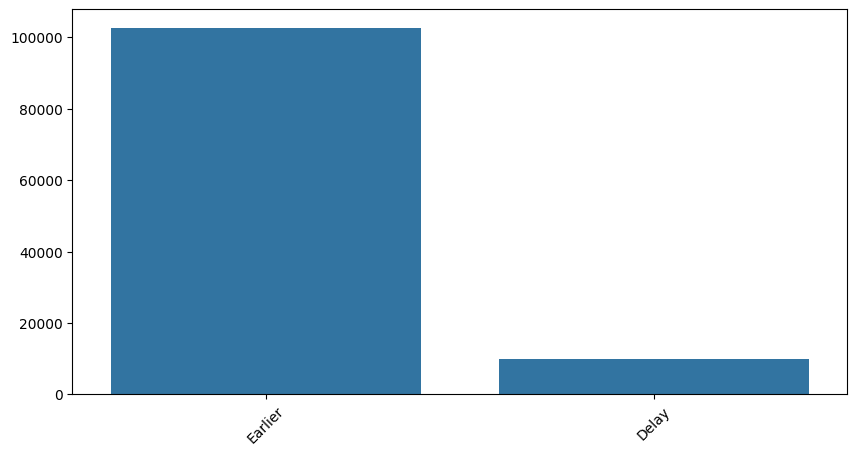

In [40]:
barChart(countStatus)

#### Product

In [41]:
orderProduct = orderItem.merge(product, how='left',left_on ='product_id', right_on='product_id')
print(orderProduct.shape)
orderProduct.head()

(112650, 27)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Order in Procces in day,Day Delivered Customer,Variance Time,Delivery Status,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,8,-8,Earlier,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,0,-17,-6,Earlier,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,0,9,13,Earlier,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,4,-16,-13,Earlier,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,1,3,-10,Earlier,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [42]:
orderProduct = orderProduct.drop(columns=['product_name_lenght',	'product_description_lenght',	'product_photos_qty',	'product_weight_g',	'product_length_cm',	'product_height_cm',	'product_width_cm',])


Discarding columns that we don't use at this stage

In [41]:
orderProduct.describe().T

,count,mean,min,25%,50%,75%,max,std
order_purchase_timestamp,112650,2018-01-01 00:09:48.464376320,2016-09-04 21:15:19,2017-09-13 19:17:04,2018-01-19 23:02:16,2018-05-04 17:30:36.750000128,2018-09-03 09:06:57,NaN
order_approved_at,112650,2018-01-01 12:00:01.835632384,2016-09-15 12:16:38,2017-09-14 06:45:15.249999872,2018-01-20 13:42:11.500000,2018-05-05 03:10:23,2018-09-03 17:40:06,NaN
order_delivered_carrier_date,112650,2018-01-05 02:37:45.879982336,2016-10-08 10:34:01,2017-09-18 20:32:26,2018-01-24 19:16:48,2018-05-08 13:31:45,2018-09-11 19:48:28,NaN
order_delivered_customer_date,112650,2018-01-14 13:04:17.977399040,2016-10-11 13:46:32,2017-09-26 19:55:45,2018-02-02 20:42:18,2018-05-15 20:26:36,2018-10-17 13:22:46,NaN
order_estimated_delivery_date,112650,2018-01-24 20:12:15.531291392,2016-10-04 00:00:00,2017-10-05 00:00:00,2018-02-16 00:00:00,2018-05-28 00:00:00,2018-10-25 00:00:00,NaN
order_item_id,112650.0,1.197834,1.0,1.0,1.0,1.0,21.0,0.705124
shipping_limit_date,112650,2018-01-07 15:36:52.192685312,2016-09-19 00:15:34,2017-09-20 20:57:27.500000,2018-01-26 13:59:35,2018-05-10 14:34:00.750000128,2020-04-09 22:35:08,NaN
price,112650.0,120.653739,0.85,39.9,74.99,134.9,6735.0,183.633928
freight_value,112650.0,19.99032,0.0,13.08,16.26,21.15,409.68,15.806405
Order in Procces in day,112650.0,0.266241,-30.0,1.0,1.0,3.0,30.0,7.760504


##### Top and Worst Product

In [45]:
topProduct = orderProduct['product_category_name_english'].value_counts().head(10)
topProduct


product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: count, dtype: int64

In [46]:
top10Product = orderProduct.groupby(by='product_category_name_english').order_id.nunique().sort_values(ascending=False).head(10)
top10Product

product_category_name_english
bed_bath_table           9417
health_beauty            8836
sports_leisure           7720
computers_accessories    6689
furniture_decor          6449
housewares               5884
watches_gifts            5624
telephony                4199
auto                     3897
toys                     3886
Name: order_id, dtype: int64

In [47]:

bottom10Product = orderProduct.groupby(by='product_category_name_english').order_id.nunique().sort_values(ascending= True).head(10)
bottom10Product


product_category_name_english
security_and_services         2
fashion_childrens_clothes     8
cds_dvds_musicals            12
la_cuisine                   13
arts_and_craftmanship        23
home_comfort_2               24
diapers_and_hygiene          27
fashion_sport                27
flowers                      29
music                        38
Name: order_id, dtype: int64

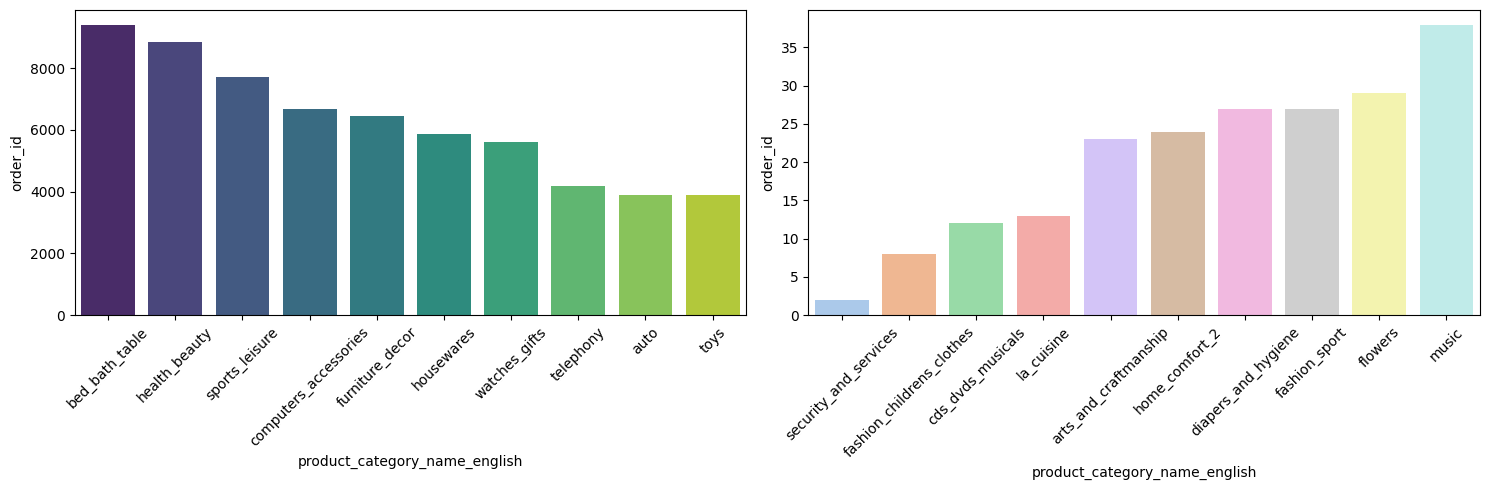

In [48]:
barChartSubplot(top10Product, bottom10Product, palette1 = 'viridis', palette2 = 'pastel')

The product category with the most purchases is bet_bath_table products, and the second position is healthy_beauty, etc., conversely security_and_services is the product category with the lowest purchases


#### Payment

In [47]:
print(orderItem.columns, orderItem.shape)
print(payment.columns, payment.shape)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'Order in Procces in day',
       'Day Delivered Customer', 'Variance Time', 'Delivery Status'],
      dtype='object') (112650, 18)
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object') (103886, 5)


In [49]:
orderPayment = orderItem.merge(payment, how = 'inner', on = 'order_id')
print(orderPayment.shape)
orderPayment.head()


(117601, 22)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Order in Procces in day,Day Delivered Customer,Variance Time,Delivery Status,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,8,-8,Earlier,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,8,-8,Earlier,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,8,-8,Earlier,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,0,-17,-6,Earlier,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,0,9,13,Earlier,1,credit_card,3,179.12


In this step, two dataframes, 'orderItem' and 'payment', are merged based on the 'order_id' column using the inner join method. The result is a new dataframe named 'orderPayment' containing the combined data from both dataframes.

In [50]:
paymentGroup = orderPayment.groupby('order_id').agg({
    'payment_type': lambda x: 'payment multitype' if len(set(x)) > 1 else x.iloc[0],
    'payment_sequential': 'sum',
    'payment_installments': 'sum',
    'payment_value': 'sum'
}).reset_index()

paymentGroup.head()

,order_id,payment_type,payment_sequential,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,1,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,credit_card,1,3,259.83
2,000229ec398224ef6ca0657da4fc703e,credit_card,1,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,credit_card,1,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,1,3,218.04


In this step, I am grouping and aggregating payment data within the 'orderPayment' dataframe based on the order number ('order_id'). This includes calculating the count of payment orders, total installment payments, and total payment amount. Additionally, payment types are merged if there are multiple types within one order, or only taking the payment type value if there's only one type available. The result is stored in the 'paymentGroup' dataframe.

In [50]:
paymentGroup.shape

(98665, 5)

In [51]:
paymentType = paymentGroup.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)
paymentType


payment_type
credit_card          73764
boleto               19614
payment multitype     2227
voucher               1540
debit_card            1520
Name: order_id, dtype: int64

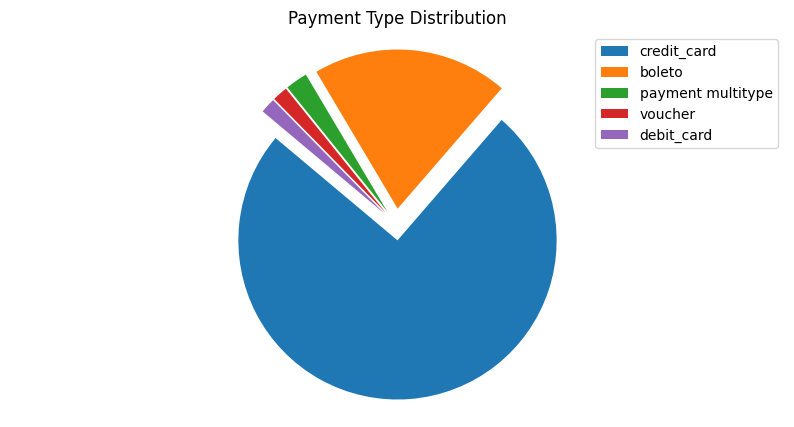

In [52]:
plt.figure(figsize=(10, 5))
explode = [0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(paymentType, autopct='', startangle=140, explode=explode)
plt.axis('equal')
plt.title('Payment Type Distribution')
plt.legend(paymentType.index)
plt.show()


In this step, I group the count of unique orders based on payment types in the 'paymentGroup' dataframe. The result shows that payment using credit card ('credit_card') is the most common, followed by payment with boleto ('boleto'). There are also some orders with mixed payment types ('payment multitype').

##### Payment Installment

In [54]:


paymentInstallment = paymentGroup.groupby(by='payment_type').agg({
    'order_id':'nunique',
    'payment_installments': ['mean', 'min', 'max','std']
})
paymentInstallment

order_id payment_installments                   
                   nunique                 mean min  max       std
payment_type                                                      
boleto               19614             1.165851   1   20  0.628748
credit_card          73764             4.190527   0  240  4.823353
debit_card            1520             1.111842   1    7  0.471007
payment multitype     2227             4.147732   2   50  4.517929
voucher               1540             1.806494   1   63  2.461178

The insight obtained is that the credit card type of payment is more dominant in paying in installments and the average is 3 installments, followed by the boleto type of payment.


##### Purchase

In [55]:
purchase = orderPayment.groupby(orderPayment['order_purchase_timestamp'].dt.year).customer_id.nunique().sort_values(ascending=False)
purchase

order_purchase_timestamp
2018    53775
2017    44579
2016      311
Name: customer_id, dtype: int64

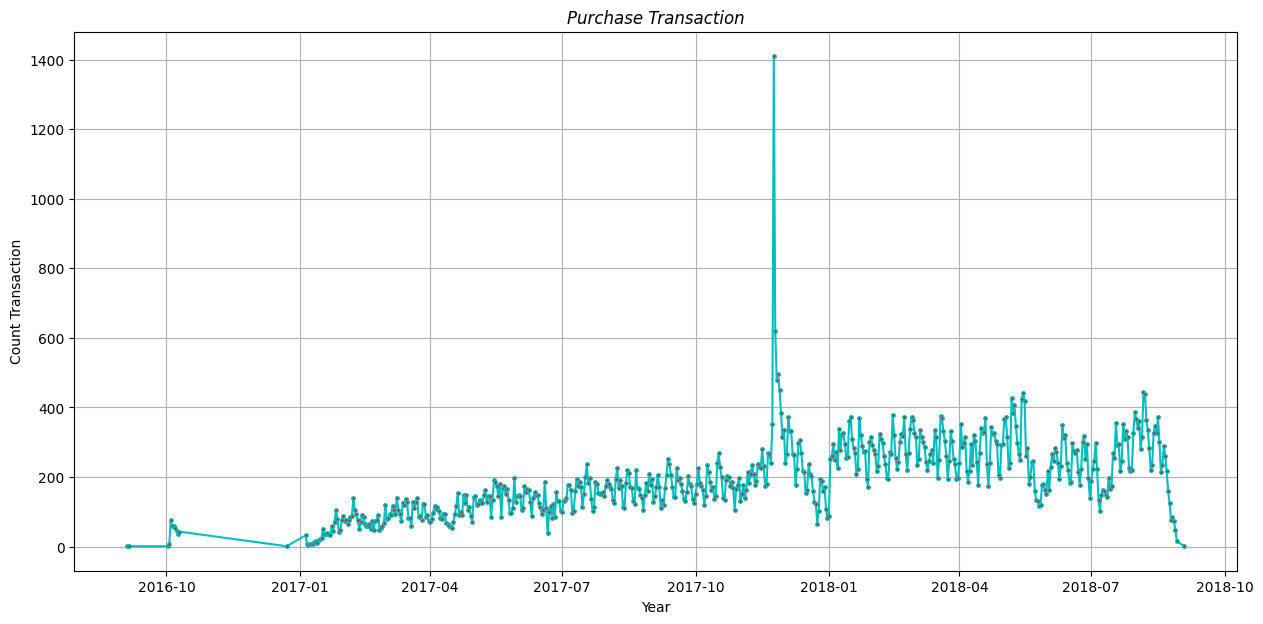

In [56]:

purchasePlot = orderPayment.groupby(orderPayment['order_purchase_timestamp'].dt.date).size()
plt.figure(figsize=(15,7))
plt.plot(purchasePlot.index, purchasePlot.values, marker ='o', linestyle = '-',markerfacecolor='red', color='c',markersize = 2.5)
plt.ylabel('Count Transaction')
plt.xlabel('Year')
plt.title('Purchase Transaction',style='italic')
plt.grid(True)
plt.show()

The insight obtained is that at the end of 2017 it jumped higher than usual



##### Time Transaction

In [57]:
orderPayment['Time Transaction'] = orderPayment['order_purchase_timestamp'].dt.hour

def timeMoment(hour):
  if 5 <= hour <12:
    return 'Morning'
  elif 12 <= hour < 17:
    return 'Day'
  elif 17 <= hour <19:
    return 'Afternoon'
  elif 19 <= hour < 24:
    return 'Night'
  else:
    return 'Early days'

orderPayment['Time Transaction']  = orderPayment['Time Transaction'].apply(timeMoment)

Create a new column to identify when the buyer placed the order


In [58]:

timeTransaction = orderPayment.groupby(by = 'Time Transaction').order_id.nunique().sort_values(ascending=False)
timeTransaction

Time Transaction
Day           31953
Night         28133
Morning       22230
Afternoon     11836
Early days     4513
Name: order_id, dtype: int64

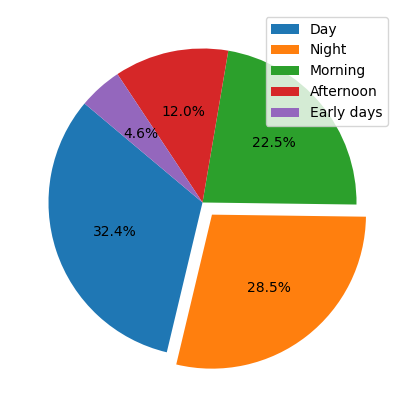

In [59]:
plt.figure(figsize=(15,5))
explode = 0,0.1,0,0,0
plt.pie(timeTransaction, autopct = '%1.1f%%', explode= explode, startangle =140)
plt.legend(timeTransaction.index)
plt.show()








The insight gained is that buyers more often place orders during the day and then at night

In [60]:
status = orderItem.groupby(by = 'Delivery Status').order_id.nunique().sort_values(ascending=False)
status

Delivery Status
Earlier    89692
Delay       8974
Name: order_id, dtype: int64

From the overall data, it was found that around 90.5% of orders were received by customers earlier than the estimate given by the seller, then 9.5% of orders were received late by buyers.


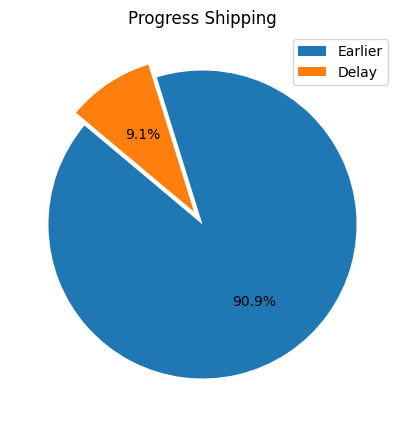

In [61]:
pieChart(status,(0,0.1), 'Progress Shipping')

##### Status Delivery Count Customer and City

In [62]:
orders = orderItem.merge(cust, how = 'inner', on = 'customer_id')
print(orders.shape)
orders.head()

(112650, 22)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Order in Procces in day,Day Delivered Customer,Variance Time,Delivery Status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,8,-8,Earlier,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,0,-17,-6,Earlier,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,0,9,13,Earlier,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,4,-16,-13,Earlier,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,1,3,-10,Earlier,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Combine cust data with orderItem into orders


In [63]:

orders.groupby(by='Delivery Status').agg({
    'customer_id':'nunique',
    'customer_city':'nunique'

})

,customer_id,customer_city
Delivery Status,,
Delay,8974,1412
Earlier,89692,3971


In [64]:
statusDelivbyCity = orders.groupby(['customer_city','Delivery Status']).size().unstack(fill_value=0).sort_values(by='customer_city', ascending=False)
statusDelivbyCity


Delivery Status,Delay,Earlier
customer_city,,
zortea,0,2
ze doca,2,3
zacarias,1,1
xique-xique,0,3
xinguara,2,8
...,...,...
abaiara,1,1
abaetetuba,4,10
abaete,1,11


##### Sellers Distribution

In [53]:
ordersSellers = orderItem.merge(sellers, how='inner',on = 'seller_id')


combine orders data with sellers to dig deeper insights

In [54]:
top10SellersLocation = ordersSellers.groupby('seller_city').seller_id.nunique().sort_values(ascending=False).head(10)
top10SellersLocation

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [55]:
bottom10SellersLocation = ordersSellers.groupby('seller_city').seller_id.nunique().sort_values(ascending=True).head(10)
bottom10SellersLocation

seller_city
04482255           1
nova lima          1
nhandeara          1
neopolis           1
muriae             1
muqui              1
mucambo            1
monteiro lobato    1
monte siao         1
monte alto         1
Name: seller_id, dtype: int64

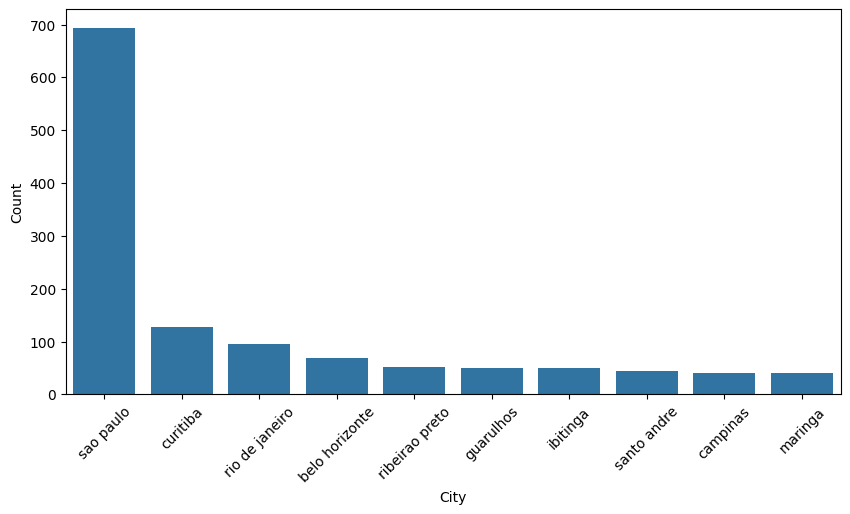

In [56]:

barChart(top10SellersLocation, ylabel = 'Count', xlabel='City')

The city of Sau Paulo is the city with the most sellers with 694 sellers, and the next city is the city of Curitibia


##### Reviews

In [69]:
print(orderProduct.shape)
print(reviews.shape)

(112650, 20)
(99224, 7)


In [70]:
ordersReviews = orderProduct.merge(reviews, how='inner',on='order_id')
print(ordersReviews.shape)
ordersReviews.head()

(112372, 26)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Order in Procces in day,Day Delivered Customer,Variance Time,Delivery Status,product_category_name,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,8,-8,Earlier,utilidades_domesticas,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,0,-17,-6,Earlier,perfumaria,perfumery,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,0,9,13,Earlier,automotivo,auto,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,4,-16,-13,Earlier,pet_shop,pet_shop,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,1,3,-10,Earlier,papelaria,stationery,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [71]:
ordersReviews['review_score'].describe()

count    112372.000000
mean          4.032473
std           1.387849
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

Overall ordersReviews purchased by customers received an average rating of 4


In [72]:
categoryScore = ordersReviews.groupby(by='product_category_name_english').agg({
    'review_score' : ['min','max','mean']
})
categoryScore

review_score              
                                       min max      mean
product_category_name_english                           
agro_industry_and_commerce               1   5  4.000000
air_conditioning                         1   5  3.969178
art                                      1   5  3.937198
arts_and_craftmanship                    1   5  4.125000
audio                                    1   5  3.825485
...                                    ...  ..       ...
stationery                               1   5  4.193857
tablets_printing_image                   1   5  4.123457
telephony                                1   5  3.946867
toys                                     1   5  4.158641
watches_gifts                            1   5  4.019160

[71 rows x 3 columns]

In [73]:
top20Category = categoryScore.sort_values(by =('review_score', 'mean'), ascending=False).head(20)
print(top20Category)

                                      review_score              
                                               min max      mean
product_category_name_english                                   
cds_dvds_musicals                                3   5  4.642857
fashion_childrens_clothes                        1   5  4.500000
books_general_interest                           1   5  4.446266
costruction_tools_tools                          1   5  4.444444
flowers                                          1   5  4.419355
books_imported                                   1   5  4.400000
books_technical                                  1   5  4.368421
food_drink                                       1   5  4.315412
luggage_accessories                              1   5  4.315257
small_appliances_home_oven_and_coffee            1   5  4.302632
fashion_sport                                    1   5  4.258065
fashion_shoes                                    1   5  4.233716
food                     

In [74]:
bottom20Category = categoryScore.sort_values(by =('review_score', 'mean'), ascending=True).head(20)
print(bottom20Category)

                                        review_score              
                                                 min max      mean
product_category_name_english                                     
security_and_services                              1   4  2.500000
diapers_and_hygiene                                1   5  3.256410
office_furniture                                   1   5  3.493183
home_comfort_2                                     1   5  3.629630
fashion_male_clothing                              1   5  3.641221
fixed_telephony                                    1   5  3.683206
party_supplies                                     1   5  3.767442
fashio_female_clothing                             1   5  3.780000
furniture_mattress_and_upholstery                  1   5  3.815789
audio                                              1   5  3.825485
home_confort                                       1   5  3.829885
construction_tools_safety                          1   5  3.84

##### Trend Price

In [75]:
monthlyPrice = orderItem.groupby(orderItem['order_purchase_timestamp'].dt.to_period('M'))['price'].mean()


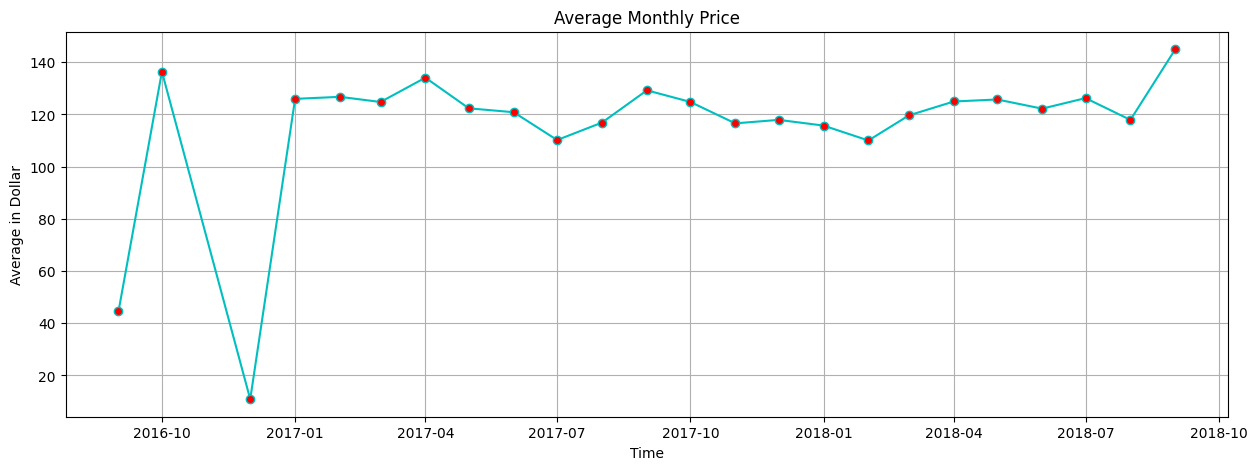

In [76]:
plt.figure(figsize=(15,5))
plt.plot(monthlyPrice.index.to_timestamp(), monthlyPrice.values, marker='o', linestyle='-',color = 'c', markerfacecolor='r' )
plt.title('Average Monthly Price')
plt.grid(True)
plt.ylabel('Average in Dollar')
plt.xlabel('Time')
plt.show()



in this section it can be seen that the average price of all products purchased by customers over time experienced ups and downs, with the lowest average price at the end of 2016 and the peak at the end of 2017 experiencing a significant increase

## **SUMMARY**

- The Sao Paulo region stands out as a hub of activity with the most solid customer base.
- The most popular product category is bet_bath_table, indicating the primary preference of customers for household needs. This is followed by healthy_beauty, reflecting awareness of health and beauty.
- Credit cards dominate the payment method, especially for installment payments, highlighting customers' preference for convenience and flexibility in transactions.
- Ordering patterns show a strong trend of activity both during the day and at night, indicating diverse customer needs.
- Approximately 90.5% of orders arrive earlier than estimated, indicating excellence in order management and delivery. Meanwhile, 9.5% of delayed orders highlight areas for improvement in logistics management.
- Sao Paulo emerges as the sales hub with the highest number of sellers, reflecting a large market potential in the region. This is followed by Curitibia, indicating economic development in that area.
- The average order rating reaches 4, indicating overall customer satisfaction.
- The average product prices experience significant fluctuations, with a peak occurring at the end of 2017, suggesting changes in customer purchasing behavior that need further understanding.

In [77]:

sellerGeoDataset['latitude_longitude'] = sellerGeoDataset['geolocation_lat'].astype(str) + ', ' + sellerGeoDataset['geolocation_lng'].astype(str)
custgeo['latitude_longitude'] = custgeo['geolocation_lat'].astype(str) + ', ' + custgeo['geolocation_lng'].astype(str)

At this stage I created a combined column of latitude and longitude in one column to the sellergeodataset and custgeo datasets to make it easier to see the location distribution clearly.

## **Convert to CSV**
We will convert everything that has been analyzed into a CSV file to make it easier to create a dashboard

In [ ]:

sellerGeoDataset.to_csv('seller-geo-dataset.csv', index=False)
custgeo.to_csv('customer-geo-dataset.csv', index=False)
orderItem.to_csv('order-item.csv', index=False)
paymentGroup.to_csv('payment-type.csv', index=False)
orderProduct.to_csv('product.csv',index=False)
ordersSellers.to_csv('seller.csv',index=False)
ordersReviews.to_csv('Reviews.csv',index=False)